In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
RAW_DATABASE_NAME = '/data/experiments/P3830/raw-databases/P3830_YeastUPS1_01_Slot1-1_1_5066.d/analysis.tdf'

In [4]:
# frame types for PASEF mode
FRAME_TYPE_MS1 = 0
FRAME_TYPE_MS2 = 8

In [5]:
db_conn = sqlite3.connect(RAW_DATABASE_NAME)
frame_intensity_df = pd.read_sql_query("select Id,SummedIntensities,Time from Frames where MsMsType == {} order by Time".format(FRAME_TYPE_MS1), db_conn)
db_conn.close()

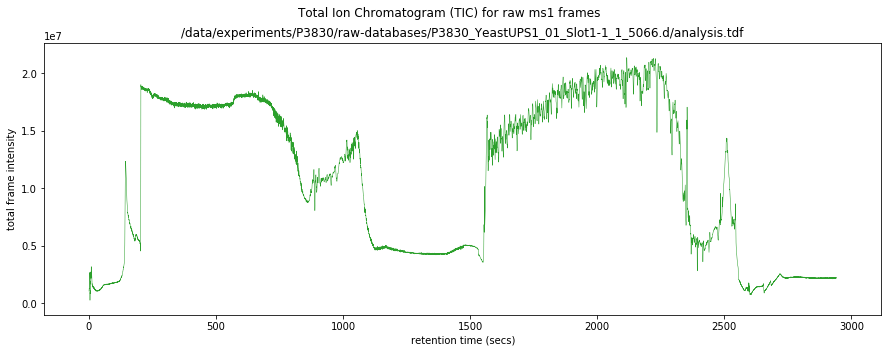

In [8]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
# plt.axvline(x=34.2, linestyle=':', color='tab:purple')
# plt.axvline(x=126, linestyle=':', color='tab:cyan')
ax1.plot(frame_intensity_df.Time, frame_intensity_df.SummedIntensities, marker='', linestyle='-', linewidth=0.5, ms=2, color='tab:green', label='frame')
plt.margins(0.06)
plt.suptitle('Total Ion Chromatogram (TIC) for raw ms1 frames')
plt.title('{}'.format(RAW_DATABASE_NAME))
plt.show()